<a href="https://colab.research.google.com/github/Damneetsingh01/Week-6.2_Indian_Cars-EDA-/blob/main/Indian_Cars(EDA)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Exploratory Data Analysis

### Task 2 : Indian Cars (EDA)

# Getting an overview of Dataset

* Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

* Load The Data

In [ ]:
cars = pd.read_csv('/content/cars_ds_final.csv')

* Copy The Data

In [ ]:
car_df = cars.copy()

* Making The Columns Lowercase

In [ ]:
car_df.columns = car_df.columns.str.lower()

* Columns Of Dataset

In [ ]:
car_df.columns

Index(['unnamed: 0', 'make', 'model', 'variant', 'ex-showroom_price',
       'displacement', 'cylinders', 'valves_per_cylinder', 'drivetrain',
       'cylinder_configuration',
       ...
       'leather_wrapped_steering', 'automatic_headlamps', 'engine_type',
       'asr_/_traction_control', 'cruise_control', 'usb_ports',
       'heads-up_display', 'welcome_lights', 'battery', 'electric_range'],
      dtype='object', length=141)

* Info Of Dataset

In [ ]:
car_df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 141 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    unnamed: 0                                 int64  
 1    make                                       object 
 2    model                                      object 
 3    variant                                    object 
 4    ex-showroom_price                          object 
 5    displacement                               object 
 6    cylinders                                  float64
 7    valves_per_cylinder                        float64
 8    drivetrain                                 object 
 9    cylinder_configuration                     object 
 10   emission_norm                              object 
 11   engine_location                            object 
 12   fuel_system                                object 
 13   fuel_tank_capacity             

* Shape Of Dataset

In [ ]:
car_df.shape

(1276, 141)

* Decription of Dataset

In [ ]:
car_df.describe()

,unnamed: 0,cylinders,valves_per_cylinder,doors,seating_capacity,number_of_airbags,usb_ports
count,1276.000000,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,637.500000,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,368.493781,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,318.750000,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,637.500000,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,956.250000,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1275.000000,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


* Random Data from Dataset

In [ ]:
car_df.sample()

,unnamed: 0,make,model,variant,ex-showroom_price,displacement,cylinders,valves_per_cylinder,drivetrain,cylinder_configuration,...,leather_wrapped_steering,automatic_headlamps,engine_type,asr_/_traction_control,cruise_control,usb_ports,heads-up_display,welcome_lights,battery,electric_range
1091,1091,Maruti Suzuki,Ciaz,1.3L Delta Smart Hybrid,"Rs. 9,80,689",1248 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


* Getting The Null Values From The Dataset

In [ ]:
car_df.isna().sum()

unnamed: 0              0
make                   75
model                   0
variant                 0
ex-showroom_price       0
                     ... 
usb_ports            1247
heads-up_display     1225
welcome_lights       1207
battery              1263
electric_range       1259
Length: 141, dtype: int64

# Data Cleaning

* Removing Unnecessary Column

In [ ]:
car_df = car_df.drop('unnamed: 0', axis=1)


* Checking The Changes

In [ ]:
car_df.sample()

,make,model,variant,ex-showroom_price,displacement,cylinders,valves_per_cylinder,drivetrain,cylinder_configuration,emission_norm,...,leather_wrapped_steering,automatic_headlamps,engine_type,asr_/_traction_control,cruise_control,usb_ports,heads-up_display,welcome_lights,battery,electric_range
692,Tata,Hexa,Xta 4X2,"Rs. 19,12,593",2179 cc,4.0,4.0,AWD (All Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN


* Dropping rows from the 'Make' column which has null values

In [ ]:
car_df.dropna(subset=['make'], inplace=True)

* Dropping rows from the 'Displacement' column which has null values

In [ ]:
car_df.dropna(subset=['displacement'], inplace=True)


* Performing string formatting

In [ ]:
car_df['ex-showroom_price'] = car_df['ex-showroom_price'].str.replace('Rs. ', '')

car_df['ex-showroom_price'] = car_df['ex-showroom_price'].str.replace(',', '')

car_df['ex-showroom_price'] = car_df['ex-showroom_price'].astype(int)

car_df.sample()

<ipython-input-41-b28267c7b8e7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_df['ex-showroom_price'] = car_df['ex-showroom_price'].str.replace('Rs. ', '')


,make,model,variant,ex-showroom_price,displacement,cylinders,valves_per_cylinder,drivetrain,cylinder_configuration,emission_norm,...,leather_wrapped_steering,automatic_headlamps,engine_type,asr_/_traction_control,cruise_control,usb_ports,heads-up_display,welcome_lights,battery,electric_range
151,Volkswagen,Polo,Gt Tsi,976000,1197 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


* Getting the count of the values present in 'drivetrain' column

In [ ]:
car_df['drivetrain'].value_counts()

FWD (Front Wheel Drive)    862
RWD (Rear Wheel Drive)     136
AWD (All Wheel Drive)      133
4WD                         53
Name: drivetrain, dtype: int64

* Checking for number of null values in 'drivetrain' column and dropping rows which has null values

In [ ]:
print(car_df['drivetrain'].isna().sum())

# Dropping the rows with Null Values
car_df.dropna(subset = ['drivetrain'],inplace=True)


0


* Same Process For 'cylinder_configuration' column

In [ ]:
car_df['cylinder_configuration'].isna().sum()

8

In [ ]:
# Count of Value present in 'cylinder_configuration' column
car_df['cylinder_configuration'].value_counts()

In-line    1029
V           137
W             6
Flat          4
Name: cylinder_configuration, dtype: int64

In [ ]:
# Dropping The Rows Which Has null Values
car_df.dropna(subset = ['cylinder_configuration'],inplace=True)

* Same for 'emission_norm' column

In [ ]:
car_df['emission_norm'].isna().sum()

4

In [ ]:
# Count Of Values Present in 'emission_norm' column
car_df['emission_norm'].value_counts()

BS IV     815
BS 6      335
BS VI      13
BS III      9
Name: emission_norm, dtype: int64

In [ ]:
# Dropping The Rows With Null Values
car_df.dropna(subset=['emission_norm'],inplace=True)

* Getting the names of the columns and putting them into a list if 'Yes' is present in them

In [ ]:
yes_columns = car_df.columns[car_df.eq('Yes').any()]

yes_columns_list = yes_columns.tolist()

print("Columns with 'Yes':", yes_columns_list)

Columns with 'Yes': ['power_steering', 'power_seats', 'keyless_entry', 'odometer', 'speedometer', 'tachometer', 'tripmeter', 'start_/_stop_button', '12v_power_outlet', 'aux-in_compatibility', 'average_fuel_consumption', 'bluetooth', 'cd_/_mp3_/_dvd_player', 'central_locking', 'child_safety_locks', 'clock', 'cup_holders', 'distance_to_empty', 'door_pockets', 'engine_malfunction_light', 'fm_radio', 'fuel_gauge', 'low_fuel_warning', 'multifunction_display', 'third_row_ac_vents', 'ventilation_system', 'auto-dimming_rear-view_mirror', 'hill_assist', 'gear_indicator', '3_point_seat-belt_in_middle_rear_seat', 'ambient_lightning', 'cargo/boot_lights', 'engine_immobilizer', 'high_speed_alert_system', 'lane_watch_camera/_side_mirror_camera', 'passenger_side_seat-belt_reminder', 'seat_back_pockets', 'voice_recognition', 'walk_away_auto_car_lock', 'abs_(anti-lock_braking_system)', 'headlight_reminder', 'adjustable_headrests', 'airbags', 'door_ajar_warning', 'ebd_(electronic_brake-force_distributio

* Filing the null values to the columns_with_yes with 'NO' in place of null (NaN) value

In [ ]:
car_df[yes_columns_list] = car_df[yes_columns_list].fillna('NO')

* Getting the names of the columns which is null and of object datatype (Exluding the numeric columns)

In [ ]:
nan_columns_object = car_df.columns[(car_df.isnull().any()) & (car_df.dtypes == 'object')]

nan_columns_object_list = nan_columns_object.tolist()

print("Object columns with NaN values:", nan_columns_object_list)

Object columns with NaN values: ['engine_location', 'fuel_tank_capacity', 'height', 'width', 'body_type', 'city_mileage', 'highway_mileage', 'arai_certified_mileage', 'arai_certified_mileage_for_cng', 'kerb_weight', 'gears', 'ground_clearance', 'front_brakes', 'rear_brakes', 'front_suspension', 'rear_suspension', 'front_track', 'rear_track', 'front_tyre_&_rim', 'rear_tyre_&_rim', 'power_windows', 'torque', 'seats_material', 'wheelbase', 'wheels_size', 'audiosystem', 'basic_warranty', 'boot-lid_opener', 'boot_space', 'extended_warranty', 'fuel-lid_opener', 'handbrake', 'instrument_console', 'minimum_turning_radius', 'sun_visor', 'drive_modes', 'gross_vehicle_weight', 'compression_ratio', 'other_specs', 'other_specs', 'seat_height_adjustment', 'recommended_tyre_pressure', 'engine_type', 'battery', 'electric_range']


* Filing the null values to the object_columns_with_nan with 'Not Available' in place of null (NaN) value

In [ ]:
replace_values = {column: 'Not Available' for column in nan_columns_object}

car_df.fillna(replace_values, inplace=True)


* Checking The null Values

In [ ]:
car_df.isna().sum()

make                    0
model                   0
variant                 0
ex-showroom_price       0
displacement            0
                     ... 
usb_ports            1143
heads-up_display        0
welcome_lights          0
battery                 0
electric_range          0
Length: 140, dtype: int64

* Filling the null values of 'usb_ports' columns with 0

In [ ]:
car_df['usb_ports'].fillna(0,inplace=True)

* Info of Dataset

In [ ]:
car_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 0 to 1275
Data columns (total 140 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    make                                       object 
 1    model                                      object 
 2    variant                                    object 
 3    ex-showroom_price                          int64  
 4    displacement                               object 
 5    cylinders                                  float64
 6    valves_per_cylinder                        float64
 7    drivetrain                                 object 
 8    cylinder_configuration                     object 
 9    emission_norm                              object 
 10   engine_location                            object 
 11   fuel_system                                object 
 12   fuel_tank_capacity                         object 
 13   fuel_type                      

* Description Of Dataset

In [ ]:
car_df.describe()

,ex-showroom_price,cylinders,valves_per_cylinder,doors,seating_capacity,number_of_airbags,usb_ports
count,1.172000e+03,1124.000000,1091.000000,1168.000000,1167.000000,1051.000000,1172.000000
mean,3.831528e+06,4.264235,3.974335,4.577911,5.286204,3.588011,0.044369
std,1.098235e+07,1.465702,0.862725,0.722339,1.149393,2.436353,0.303260
min,2.364470e+05,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000
25%,7.315598e+05,4.000000,4.000000,4.000000,5.000000,2.000000,0.000000
50%,9.999000e+05,4.000000,4.000000,5.000000,5.000000,2.000000,0.000000
75%,2.115975e+06,4.000000,4.000000,5.000000,5.000000,6.000000,0.000000
max,2.121554e+08,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


* Random sample from Dataset

In [ ]:
car_df.sample(10)

,make,model,variant,ex-showroom_price,displacement,cylinders,valves_per_cylinder,drivetrain,cylinder_configuration,emission_norm,...,leather_wrapped_steering,automatic_headlamps,engine_type,asr_/_traction_control,cruise_control,usb_ports,heads-up_display,welcome_lights,battery,electric_range
218,Fiat,Urban Cross,1.3 Multijet Emotion,810211,1248 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,Not Available,NO,NO,0.0,NO,NO,Not Available,Not Available
910,Maruti Suzuki,Baleno,1.2 Delta Dualjet,733412,1197 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NO,NO,Not Available,NO,NO,0.0,NO,NO,Not Available,Not Available
1061,Hyundai,Grand I10 Nios,Magna 1.2 Crdi,675090,1186 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NO,NO,Not Available,NO,NO,0.0,NO,NO,Not Available,Not Available
526,Tata,Nexon,Xza Plus (O) Diesel Dual Tone,1270000,1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NO,Yes,Not Available,NO,NO,0.0,NO,NO,Not Available,Not Available
203,Toyota,Platinum Etios,Gxd,799600,1364 cc,4.0,2.0,FWD (Front Wheel Drive),In-line,BS IV,...,NO,NO,Not Available,NO,NO,0.0,NO,NO,Not Available,Not Available
705,Toyota,Innova Crysta,2.7 Vx 7 Str,1807000,2393 cc,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS IV,...,Yes,Yes,Not Available,NO,NO,0.0,NO,NO,Not Available,Not Available
1140,Tata,Harrier,Revotorq Xz Dual Tone,1732231,1956 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NO,Yes,Not Available,Yes,NO,0.0,NO,NO,Not Available,Not Available
601,Renault,Lodgy,Stepway Rxz 85Ps 8-Seater,1130099,1461 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,NO,Not Available,NO,Yes,0.0,NO,NO,Not Available,Not Available
467,Tata,Zest,Zest Premio Edition,788797,1248 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,NO,NO,Not Available,NO,NO,0.0,NO,NO,Not Available,Not Available
13,Renault,Kwid,Std 0.8,283290,799 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NO,NO,Not Available,NO,NO,0.0,NO,NO,Not Available,Not Available


# Data Visualization

* Visualizing the count of Car Manufacturers

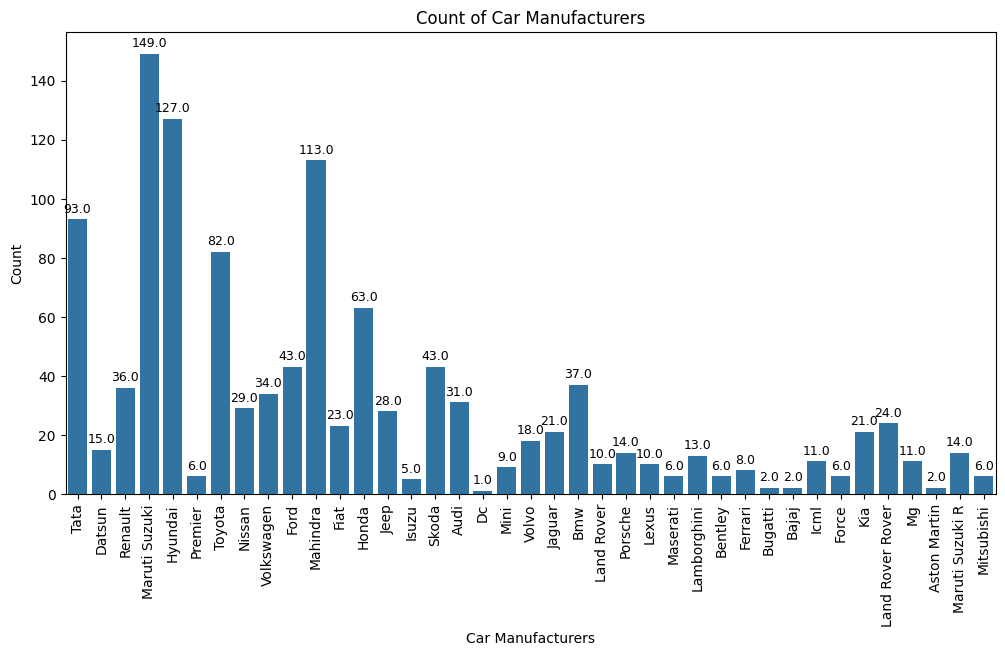

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='make', data=car_df)
plt.title('Count of Car Manufacturers')
plt.xlabel('Car Manufacturers')
plt.ylabel('Count')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

* Visualizing pair-plot for numeric data

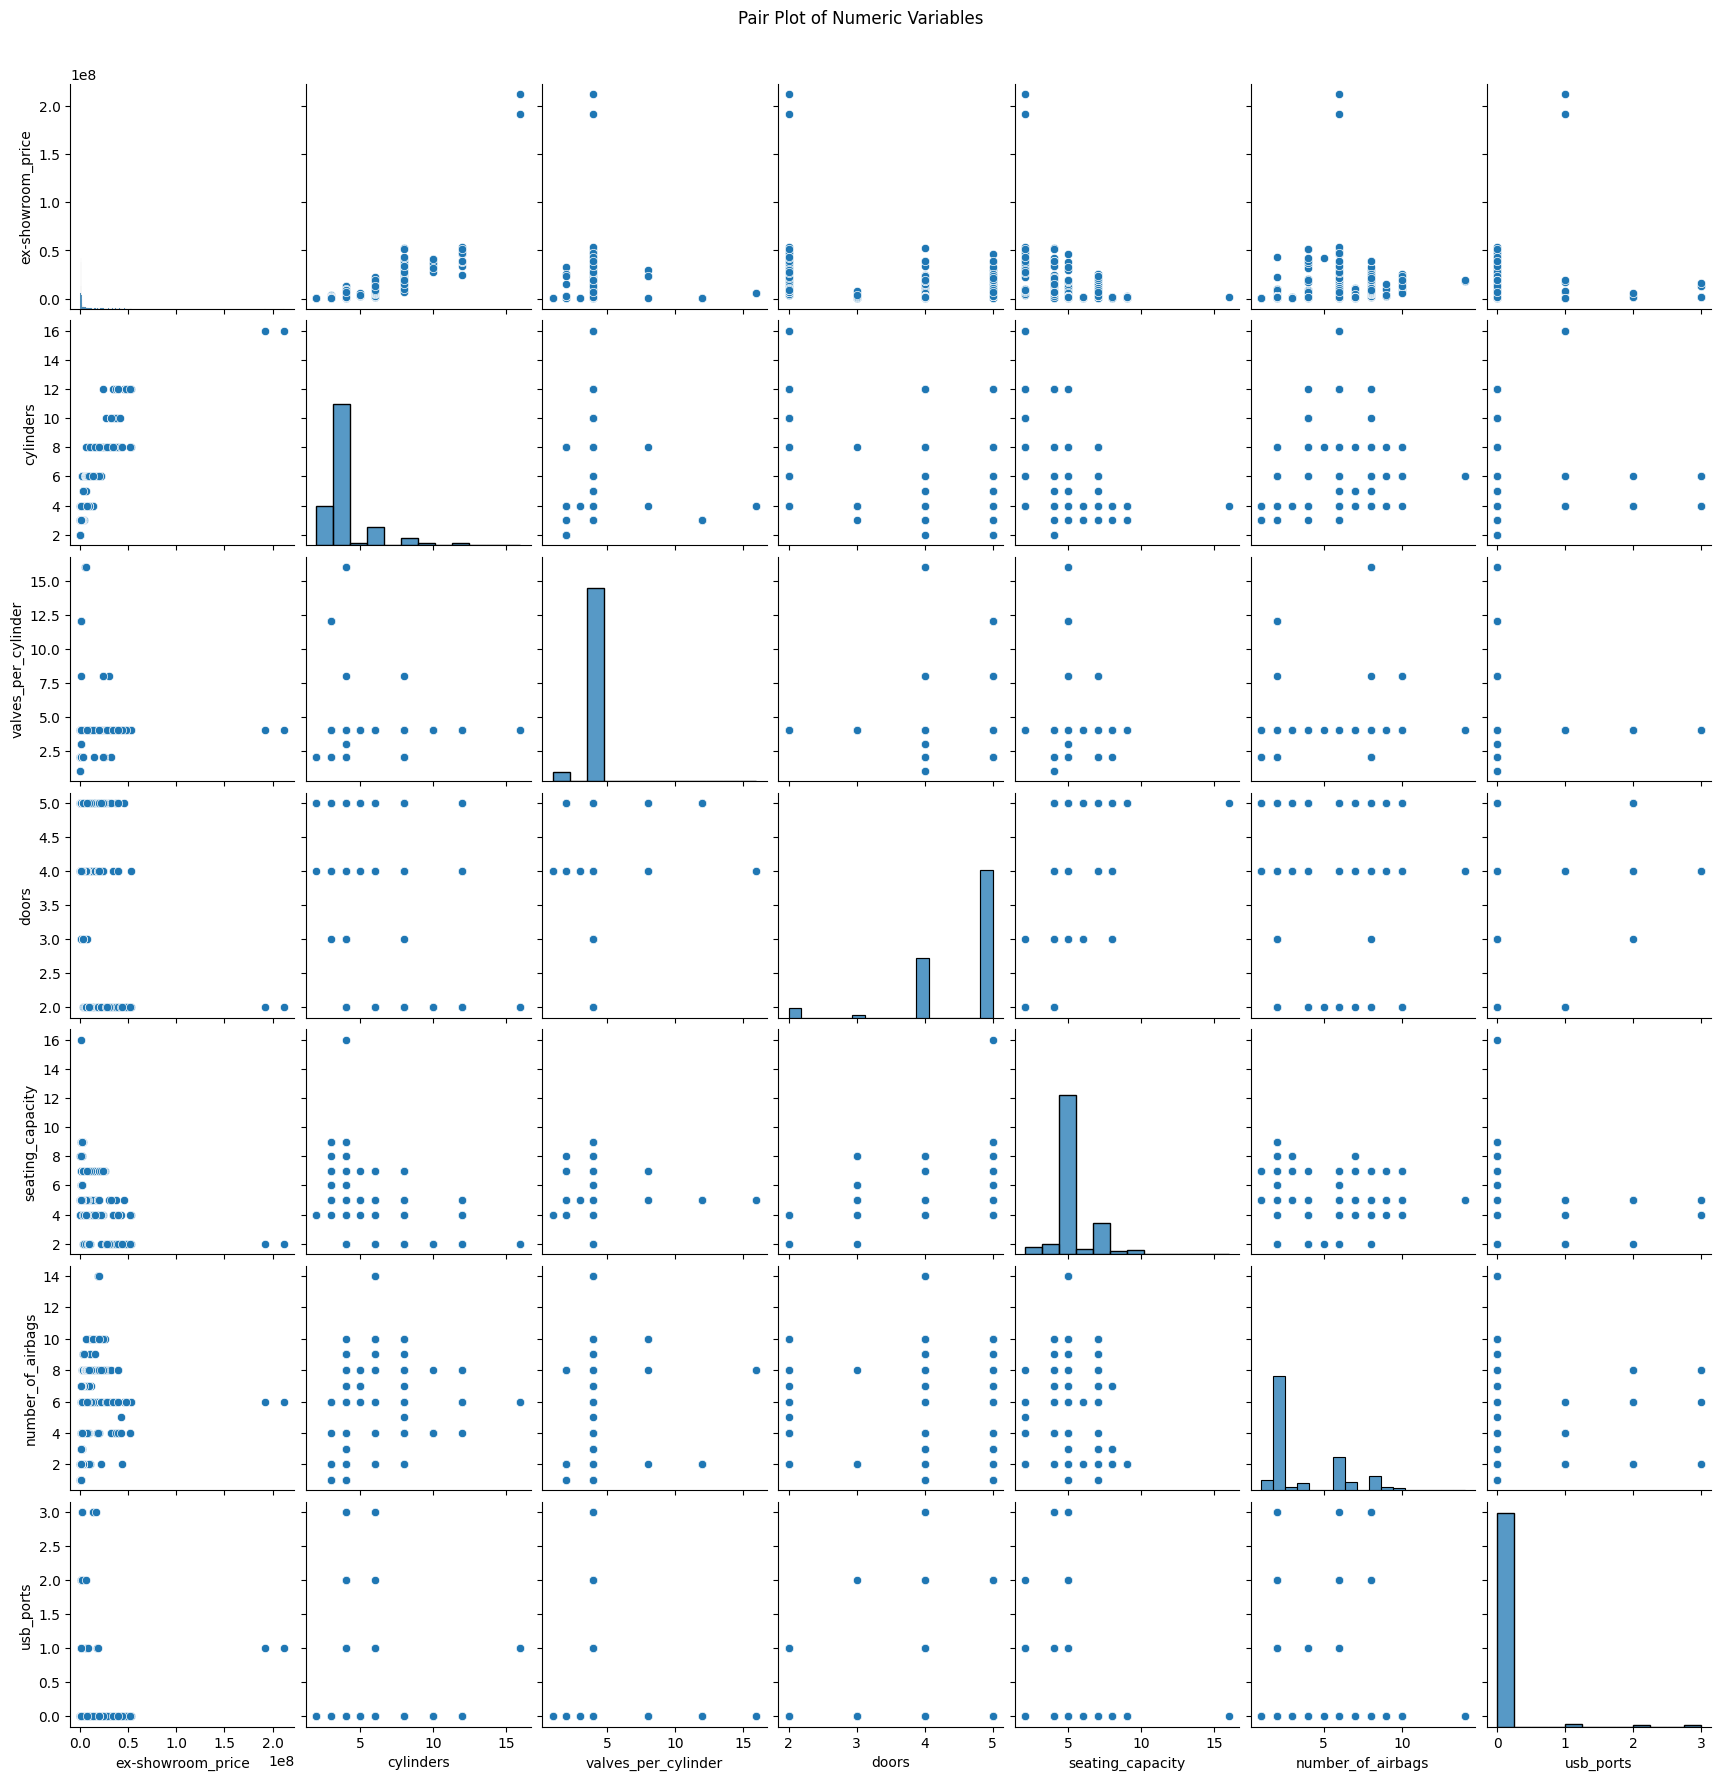

In [ ]:
numeric_columns = car_df.select_dtypes(include='number')

sns.pairplot(numeric_columns)
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

* Visualizing the count of Car Models with Manufacturers

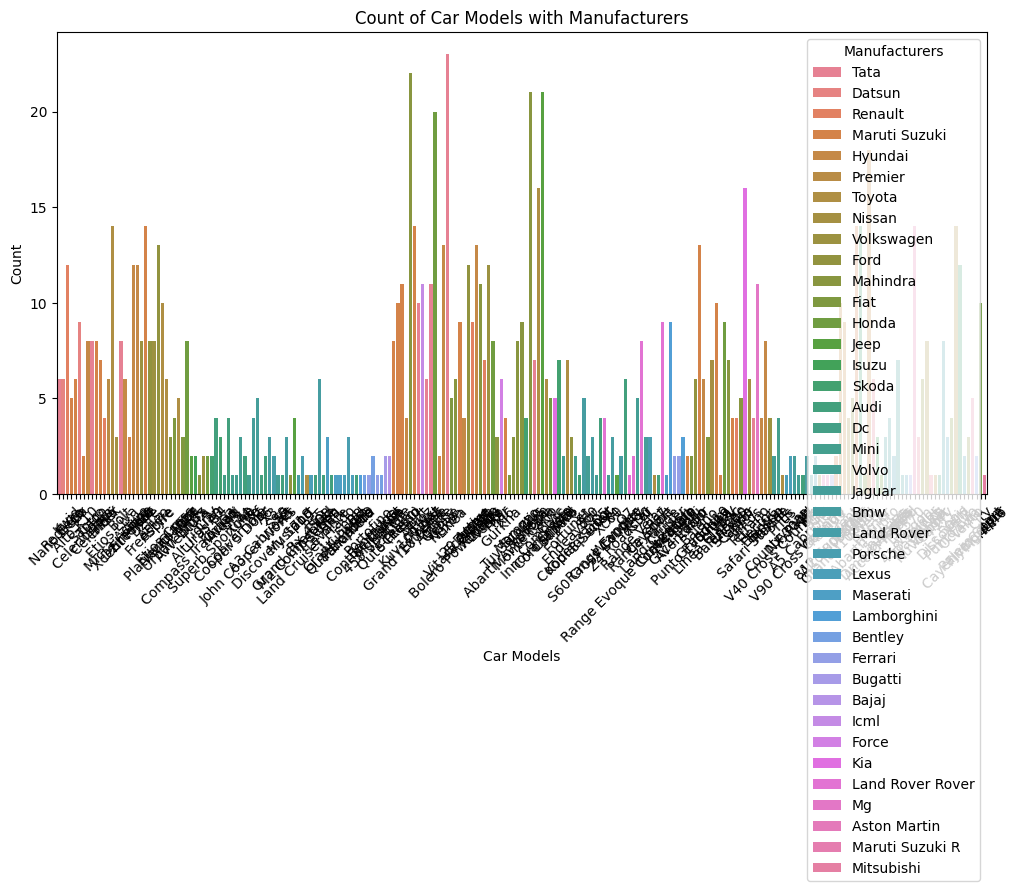

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='model', hue='make', data=car_df)
plt.title('Count of Car Models with Manufacturers')
plt.xlabel('Car Models')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Manufacturers', loc='upper right')
plt.show()

* Visualizing distribution of Ex-Showroom price

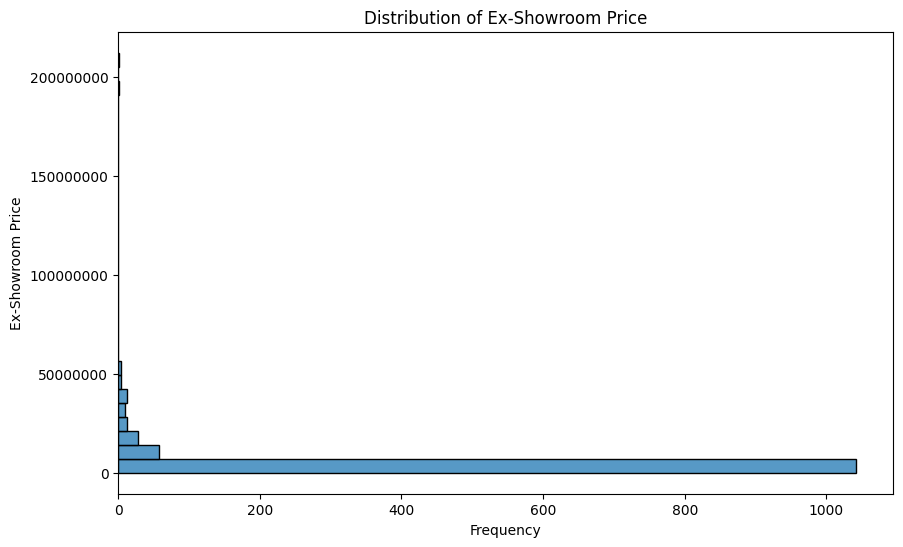

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(y=car_df['ex-showroom_price'], bins=30, kde=False)
plt.title('Distribution of Ex-Showroom Price')
plt.xlabel('Frequency')
plt.ylabel('Ex-Showroom Price')

ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

* Visualizing the box Plot of Ex-Showroom Price by Manufacturers with Car Models

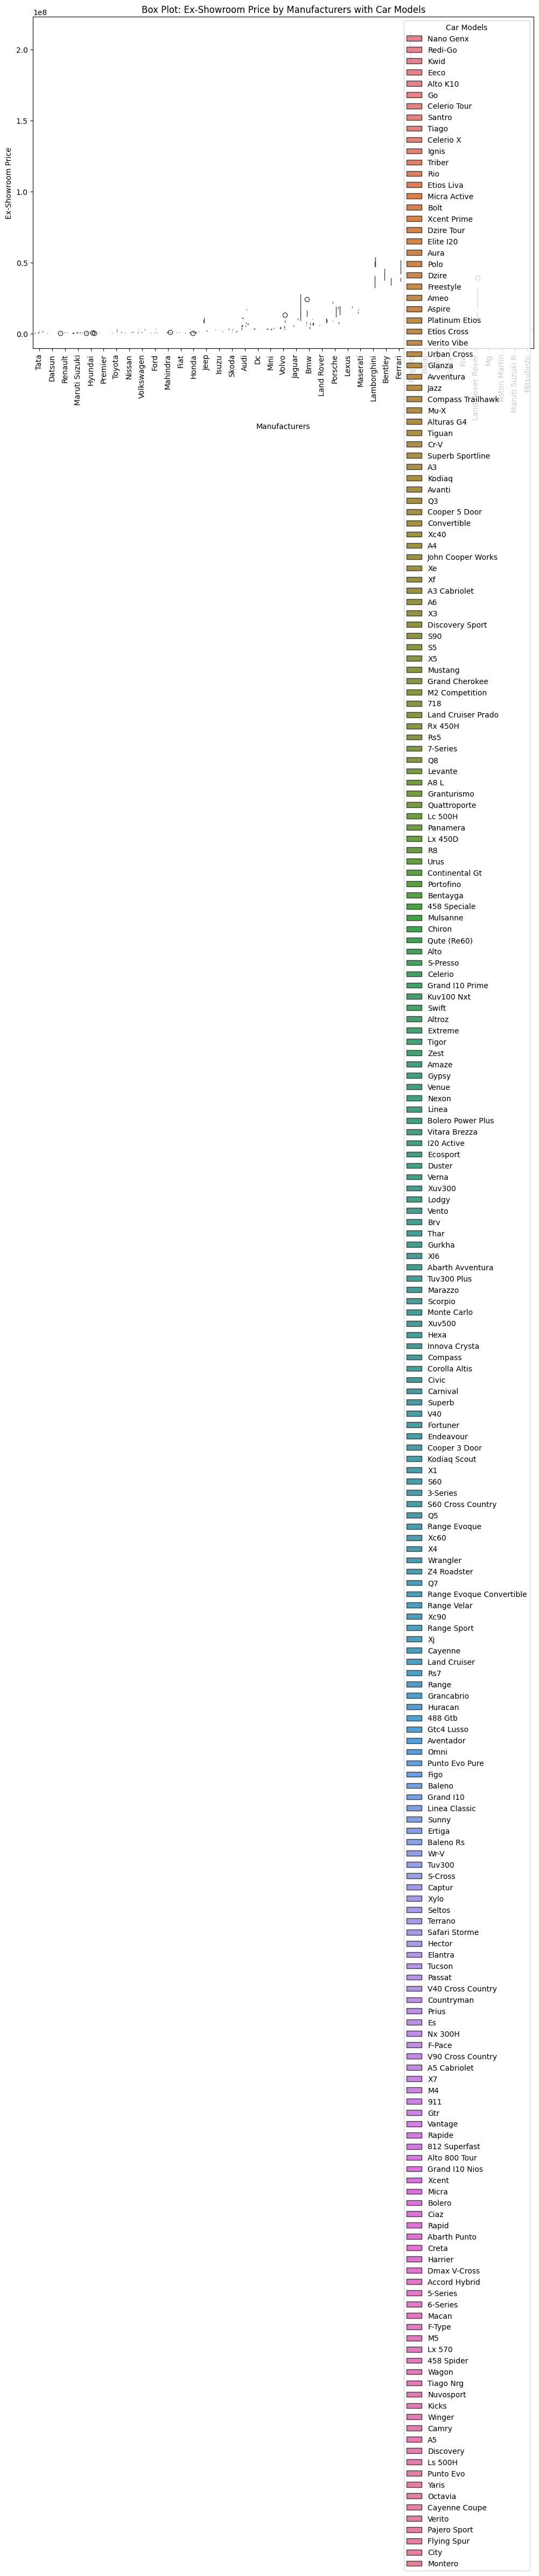

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='make', y='ex-showroom_price', hue='model', data=car_df)
plt.title('Box Plot: Ex-Showroom Price by Manufacturers with Car Models')
plt.xlabel('Manufacturers')
plt.ylabel('Ex-Showroom Price')
plt.xticks(rotation=90)
plt.legend(title='Car Models', loc='best')
plt.show()

* Visualizing the categorical Plot of Ex-Showroom Price by Car Model

<Figure size 1200x800 with 0 Axes>

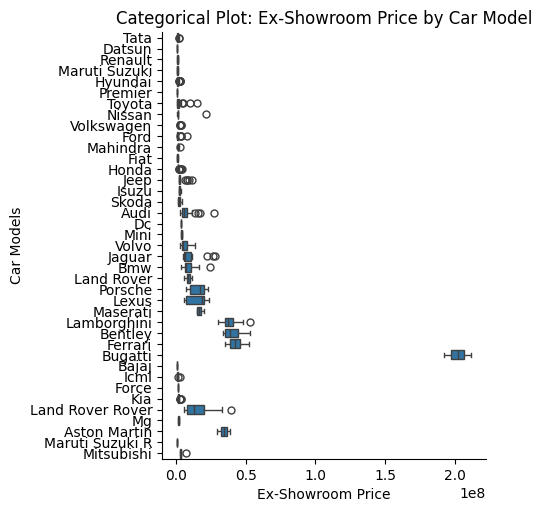

In [ ]:
plt.figure(figsize=(12, 8))
sns.catplot(x='ex-showroom_price', y='make', data=car_df, kind='box')
plt.title('Categorical Plot: Ex-Showroom Price by Car Model')
plt.ylabel('Car Models')
plt.xlabel('Ex-Showroom Price')
plt.show()


* Visualizing the violin plot for numeric columns

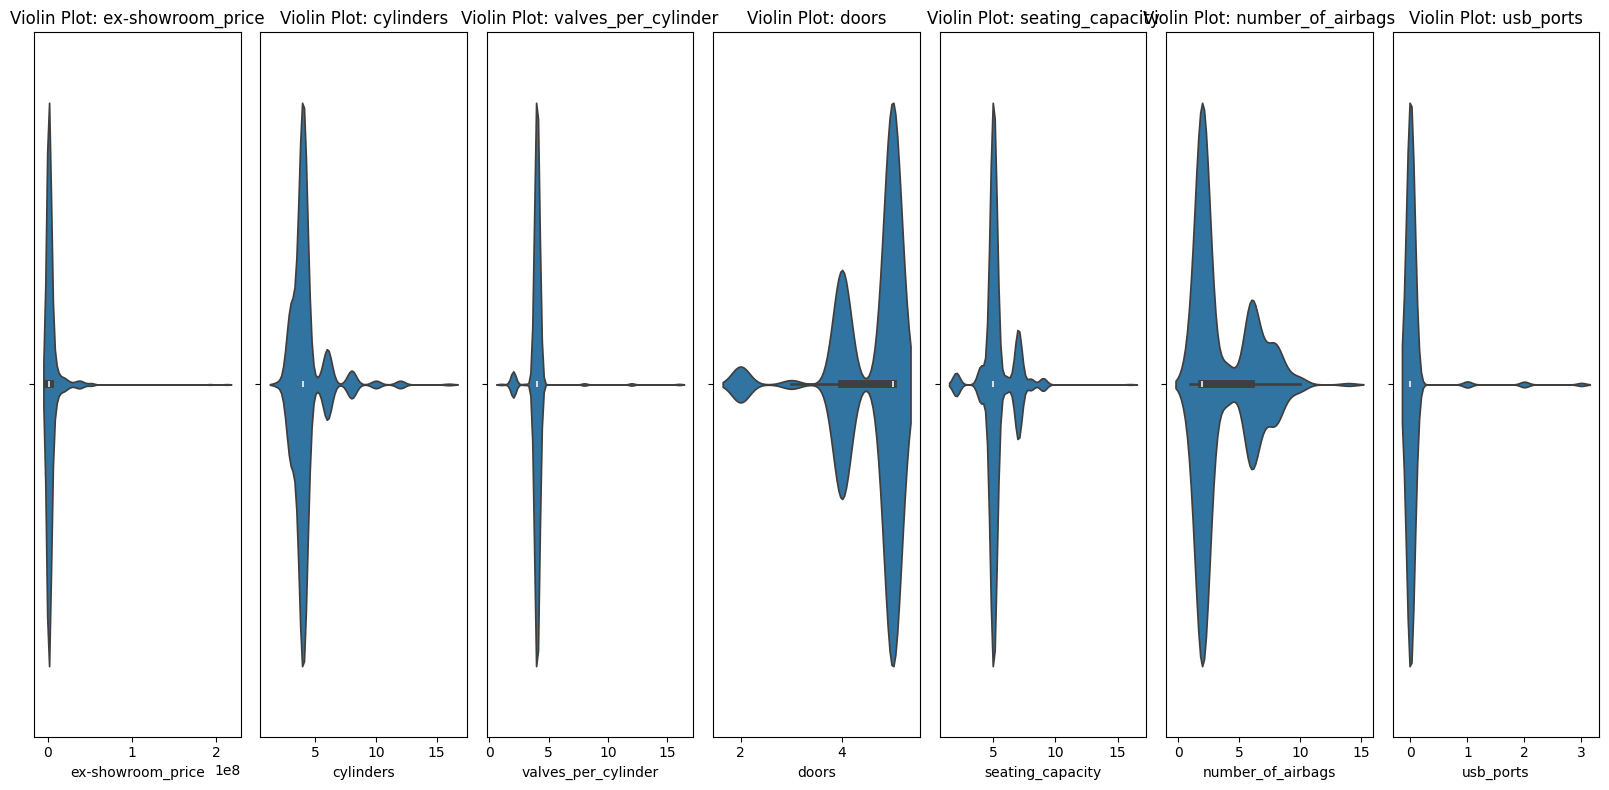

In [ ]:
numeric_columns = car_df.select_dtypes(include='number')

plt.figure(figsize=(16, 8))
for i, column in enumerate(numeric_columns.columns, 1):
    plt.subplot(1, len(numeric_columns.columns), i)
    sns.violinplot(x=column, data=car_df)
    plt.title(f'Violin Plot: {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()



* Visualizing Box Plot of all numeric columns

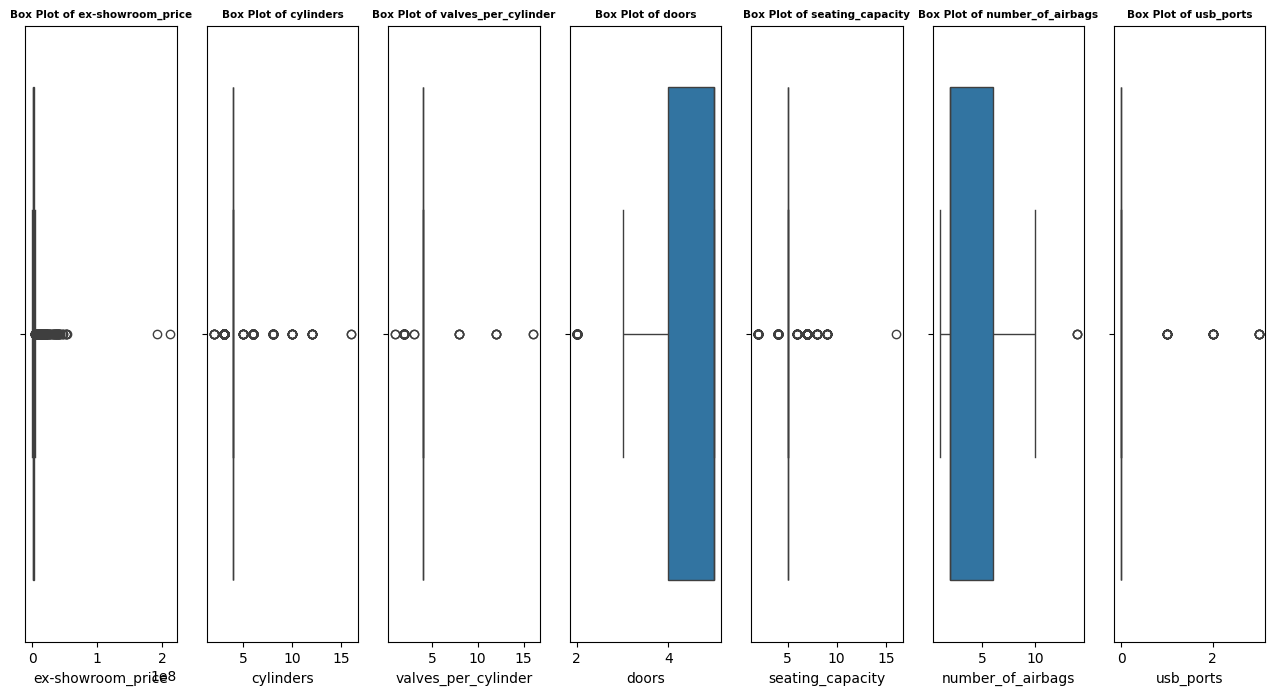

In [ ]:
numeric_columns =car_df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(x=car_df[column])
    plt.title(f'Box Plot of {column}', fontsize = 7.5, fontweight = 'bold')

plt.show()

* Visualzing the joint Plot of Seating Capacity vs Ex-Showroom Price

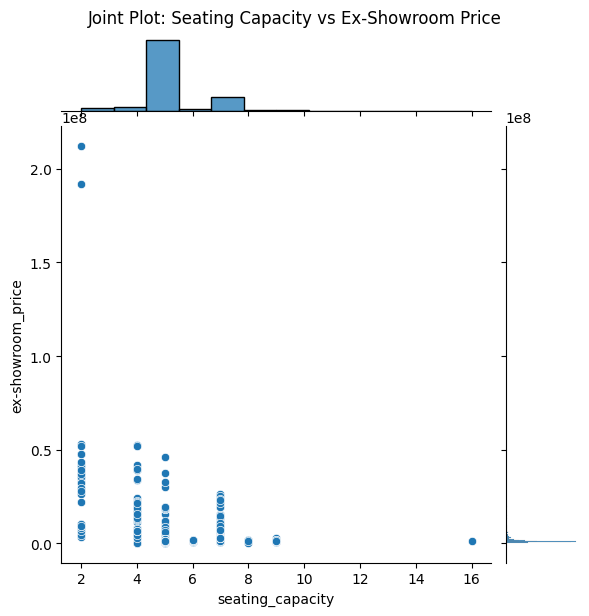

In [ ]:
sns.jointplot(x='seating_capacity', y='ex-showroom_price', data=car_df, kind='scatter')
plt.suptitle('Joint Plot: Seating Capacity vs Ex-Showroom Price', y=1.02)
plt.show()

* Visualizing the scatter plot of Seating Capacity vs Number of Airbags with Ex-Showroom Price

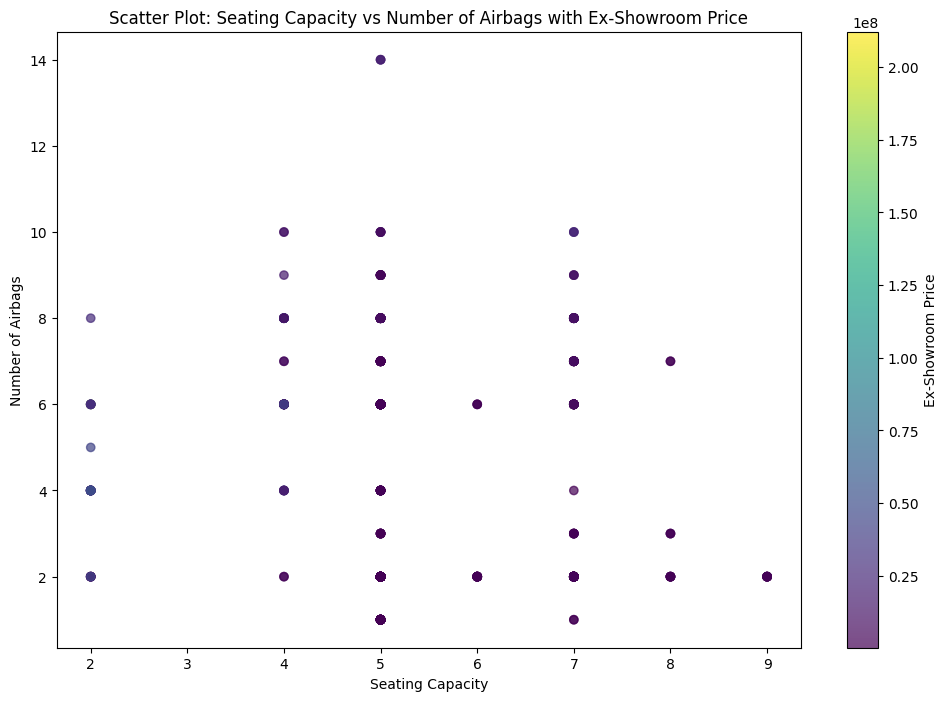

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(car_df['seating_capacity'], car_df['number_of_airbags'], c=car_df['ex-showroom_price'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Ex-Showroom Price')
plt.xlabel('Seating Capacity')
plt.ylabel('Number of Airbags')
plt.title('Scatter Plot: Seating Capacity vs Number of Airbags with Ex-Showroom Price')
plt.show()



* Visualizing Correlation Matrix

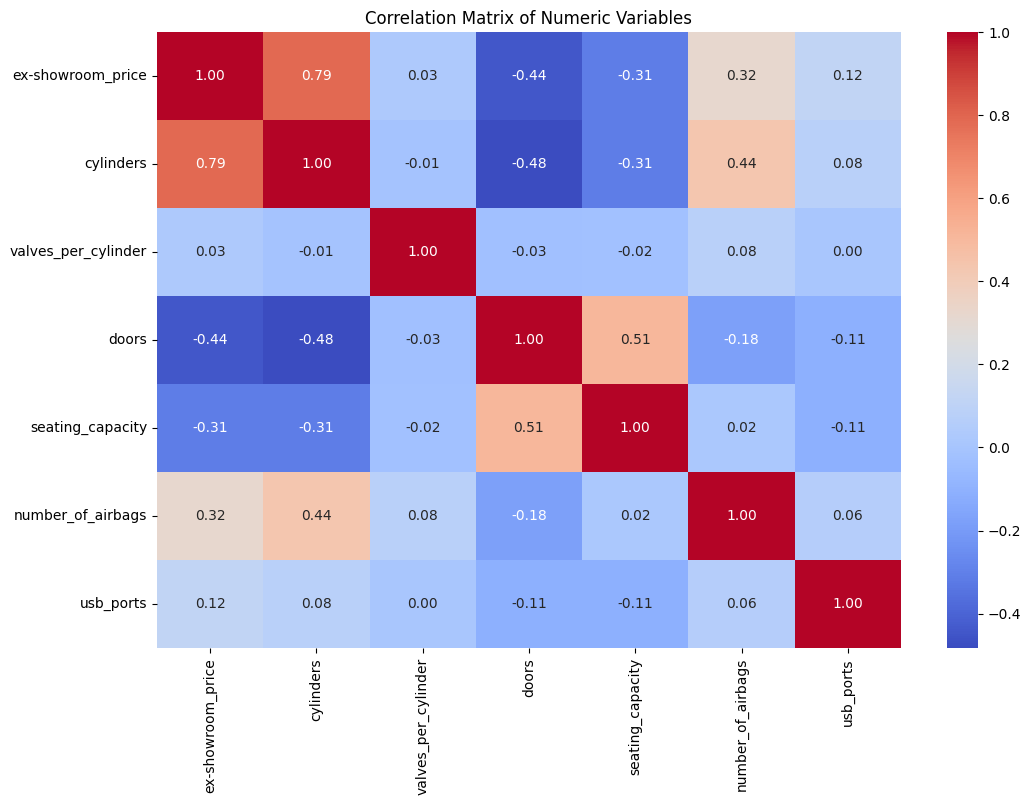

In [ ]:
numeric_columns = car_df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()